In [1]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from prol.process import get_cycle, get_multi_cycle

## MNIST (independent)

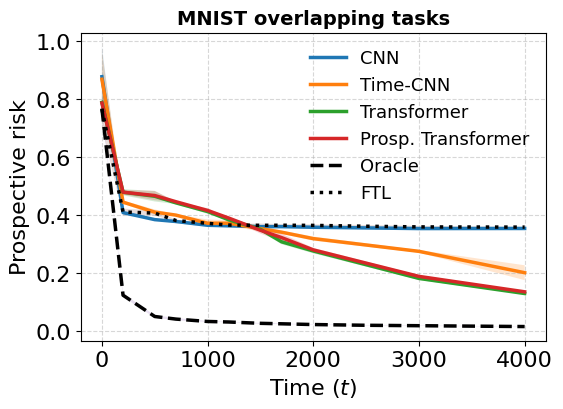

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))

# mnist 3 tasks
# files = [
#     'experiments/vision_multi/multirun/2024-05-17/01-17-46',
#     'experiments/vision_multi/multirun/2024-05-17/01-18-56',
#     'experiments/vision_multi/multirun/2024-05-17/12-39-24',
#     'experiments/vision_multi/multirun/2024-05-18/12-20-48',
#     'experiments/vision_multi/multirun/2024-05-18/01-08-37',
# ]

# 2024-05-18/12-20-48
# 2024-05-17/01-19-58

# mnist 4 tasks
# files = [
#     'experiments/vision_multi/multirun/2024-05-18/04-22-52',
#     'experiments/vision_multi/multirun/2024-05-18/05-07-18',
#     None,
#     'experiments/vision_multi/multirun/2024-05-18/04-21-20',
#     'experiments/vision_multi/multirun/2024-05-18/10-28-45',
# ]

files = [
    'experiments/vision_multi/multirun/2024-05-18/22-58-41',
    'experiments/vision_multi/multirun/2024-05-18/23-27-44',
    'experiments/vision_multi/multirun/2024-05-18/23-01-03',
    'experiments/vision_multi/multirun/2024-05-18/23-00-10',
    'experiments/vision_multi/multirun/2024-05-19/02-22-55',
    'experiments/vision_multi/multirun/2024-05-19/02-42-33',
]

names = [
    'CNN',
    'Time-CNN',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(13):
            if name != 'Oracle' and i == 1:
                continue
            if i == 10:
                continue
            fname = f'{file}/{i}/outputs.pkl'
            try:
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
            except FileNotFoundError:
                break
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            time_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(time_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('MNIST overlapping tasks', fontweight='bold', fontsize=14)
plt.show()

## CIFAR (independent)

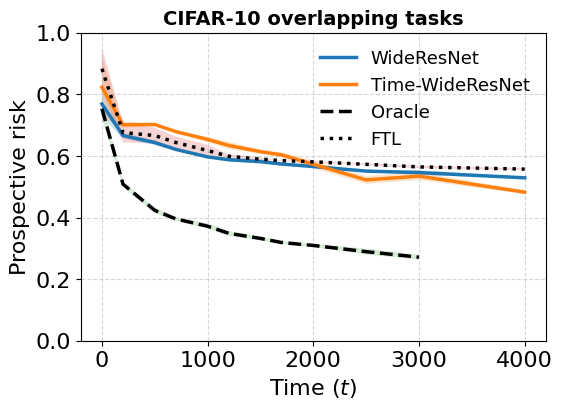

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

# CIFAR 3 tasks
# files = [
#     'experiments/vision_multi/multirun/2024-05-17/02-47-05',
#     'experiments/vision_multi/multirun/2024-05-17/02-47-37',
#     'experiments/vision_multi/multirun/2024-05-17/12-37-03',
#     'experiments/vision_multi/multirun/2024-05-17/04-05-44',
#     'experiments/vision_multi/multirun/2024-05-18/01-33-26',
# ]

files = [
    'experiments/vision_multi/multirun/2024-05-19/03-19-00',
    'experiments/vision_multi/multirun/2024-05-19/04-01-55',
    None, 
    None, 
    'experiments/vision_multi/multirun/2024-05-19/10-20-30',
    'experiments/vision_multi/multirun/2024-05-19/10-20-53'
]

names = [
    'WideResNet',
    'Time-WideResNet',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(12):
            # if i == 10:
            #     continue
            fname = f'{file}/{i}/outputs.pkl'
            try:
                with open(fname, 'rb') as f:
                    outputs = pickle.load(f)
            except FileNotFoundError:
                break
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            t_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(t_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
            ax.fill_between(t_list, risks-ci, risks+ci, alpha=0.2)
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('CIFAR-10 overlapping tasks', fontweight='bold', fontsize=14)
plt.show()

## MNIST (Markov)

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/vision_markov/multirun/2024-05-19/13-46-58/0/outputs.pkl'

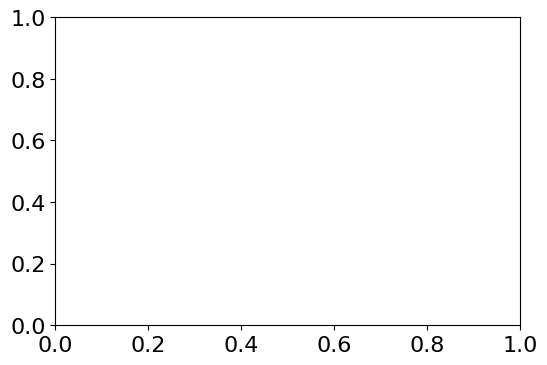

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))

# mnist 4 tasks
files = [
    'experiments/vision_markov/multirun/2024-05-19/13-46-58',
    'experiments/vision_markov/multirun/2024-05-19/14-27-26',
    None,
    None, 
    'experiments/vision_markov/multirun/2024-05-19/20-12-51', 
    None
]

names = [
    'CNN',
    'Time-CNN',
    'Transformer',
    'Prosp. Transformer',
    'Oracle',
    'FTL'
]

for file, name in zip(files, names):
    if file:
        time_list = []
        risk_list = []
        ci_list = []
        for i in range(12):
            fname = f'{file}/{i}/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            time_list.append(outputs['args']['t'])
            risk_list.append(outputs['risk'])
            ci_list.append(outputs['ci_risk'])
        risks = np.array(risk_list)
        ci = np.array(ci_list)
        if name == 'Oracle':
            ax.plot(time_list, risk_list, lw=2.5, color='k', ls='dashed', label='Oracle')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)
        elif name == 'FTL':
            fname = f'{file}/0/outputs.pkl'
            with open(fname, 'rb') as f:
                outputs = pickle.load(f)
            risks = np.array(outputs['risk'])
            ci = np.array(outputs['ci_risk'])
            time_list = [0,200,500,700,1000,1200,1500,1700,2000,2500,3000,4000]
            ax.plot(time_list, risks, lw=2.5, color='k', ls='dotted', label='FTL')
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)
        else:
            ax.plot(time_list, risk_list, lw=2.5, label=name)
            ax.fill_between(time_list, risks-ci, risks+ci, alpha=0.2)        
    else:
        continue

ax.set_xlabel(r"Time ($t$)")
ax.set_ylabel(r"Prospective risk")
# ax.set_ylim([0, 1])
ax.legend(frameon=False, fontsize=13)
ax.grid(alpha=0.5, ls='--')
ax.set_title('MNIST Markov tasks', fontweight='bold', fontsize=14)
plt.show()